Name : Prasanna Gnanavel

Student Number : 190906922

Module : ECS766A - DATA MINING

**Assignment 4 [Part 1/2]**

1. For an application on credit card fraud detection, we are interested in detecting contextual outliers. Suggest 2 possible contextual features and 2 possible behavioural features that could be used for this application, and explain why each of your suggested features should be considered as either contextual or behavioural. 

Solution:

Contextual features: defines the observation’s context

Behavioural features: define the observation’s characteristics, and are used in outlier evaluation

Contextual Features:

1. More number of transactions during festival period. (Ex: Christmas shoping)
2. Higher value transactions 

Behavioural Features:

1. Location of transacations
2. Customer Income

**Question 2**

2. **The monthly rainfall in the London borough of Tower Hamlets was measured (in mm) from January-December 2018: {22.93, 20.59, 25.65, 23.74, 25.24, 4.55, 23.45, 28.18, 23.52, 22.32, 26.73, 23.42}. Assuming that the sample is iid according to a univariate Gaussian distribution, identify outlier values in the dataset above using the maximum likelihood method. Is the assumption about the distribution reasonable?**

Solution : 

Using the maximum likelihood method, we estimate µ = 22.53 and σ = 5.76 from the
data.

The most deviating value in the given dataset is 4.55 mm is 17.97 mm away from the estimated mean. 

We know that the region [µ − 3σ, µ + 3σ] contains approximately 99.7% of the
probability mass of a Gaussian distribution

(22.53-4.55)/5.76 is 3.12 >3 , the observation 4.55 very unlikely  and can be considered as an outlier.


**Question 3**

**3**. **Suppose that you are provided with the graduation rate dataset used in Lab 3 (data/graduation_rate.csv). For the high school gpa feature, compute the relative frequency of each value (i.e., number of occurrences divided the size of the dataset). Show these computed relative frequencies in your report. Suppose that two new observations are included in the dataset, one with a high school gpa value of  3.6 , and one with a high school gpa value of  2.8 . Which of the two new observations is an outlier and why?**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


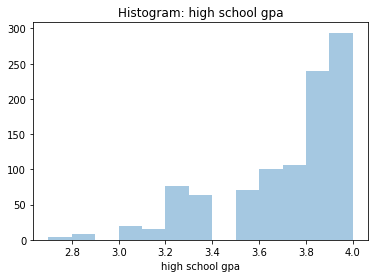

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('graduation_rate.csv',header='infer')

sns.distplot(df['high school gpa'], bins=None, kde=False)
plt.title('Histogram: high school gpa')
plt.show()

In [ ]:
print("Frequency of high school gpa")
freq_gpa = df['high school gpa'].value_counts()/len(df)
freq_gpa

Frequency of high school gpa


4.0    0.294
3.8    0.132
3.9    0.108
3.7    0.106
3.6    0.101
3.5    0.071
3.4    0.064
3.3    0.052
3.2    0.025
3.0    0.020
3.1    0.015
2.9    0.008
2.7    0.003
2.8    0.001
Name: high school gpa, dtype: float64

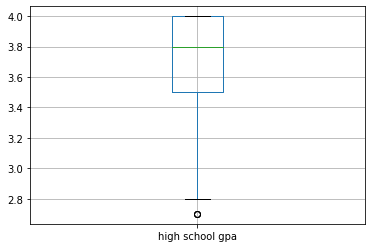

In [ ]:
df2 = pd.read_csv('graduation_rate2.csv',header='infer')

hs=df2["high school gpa"]
#df2 = pd.DataFrame([[3.6], [2.8]])
#df3=df2.append(hs)

df2.boxplot(column='high school gpa')


In [ ]:
freq_gpa2 = df2['high school gpa'].value_counts()/len(df2)
freq_gpa2

4.0    0.293413
3.8    0.131737
3.9    0.107784
3.7    0.105788
3.6    0.101796
3.5    0.070858
3.4    0.063872
3.3    0.051896
3.2    0.024950
3.0    0.019960
3.1    0.014970
2.9    0.007984
2.7    0.002994
2.8    0.001996
Name: high school gpa, dtype: float64

High school gpa value of 2.8 is an outlier since only 0.1% of population falls in 2.8 score in entire population.

**Question 4**

4. **Using the stock prices dataset considered in Sections 1 and 2, estimate the outliers in the dataset using the one-class SVM classifier approach. As input to the classifier, use the percentage of changes in the daily closing price of each stock, as done in Section 1. Plot a 3D scatterplot of the dataset where each observation is coloured according to whether it is an outlier or an inlier. Based on the plot, how does the one-class SVM approach for outlier detection differ from the parametric and proximity-based methods presented in Sections 1 and 2? What percentage of the observations are classified as outliers**? 

In [ ]:
import pandas as pd

# Load CSV file, set the 'Date' values as the index of each row, and display the first rows of the dataframe
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
#stocks.head()

In [ ]:
import numpy as np

N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values - stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [ ]:
from numpy.linalg import inv

def mahalanobis(x=None, data=None):
    x_mu = x - np.mean(data)
    cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    
    right = np.matmul(inv_covmat, x_mu.T)
    mahal = np.sum(x_mu*right.T, axis=1)
    return np.sqrt(mahal)

# Compute Mahalanobis distance for delta dataset
mahal = mahalanobis(x=delta, data=delta[['MSFT', 'F', 'BAC']])

# Assign an outlier score for the data based on the computed Mahalanobis distance
outlier_score = mahal
outlier = pd.DataFrame(outlier_score, index=delta.index, columns=['Outlier score'])
result = pd.concat((delta,outlier), axis=1)
result.nlargest(5,'Outlier score')

,MSFT,F,BAC,Outlier score
Date,,,,
10/13/2008,18.604651,20.100503,9.199808,11.269084
11/26/2008,2.501251,29.518072,4.256757,11.016388
4/9/2009,2.501297,7.341772,35.269122,10.023290
11/28/2008,-1.317721,25.116279,5.314323,9.905421
1/21/2009,4.870124,-1.877934,30.980392,9.779085


In [ ]:
X = result[['MSFT','F','BAC']]
y = result[['Outlier score']]

In [ ]:
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01, gamma='auto')
yhat = ee.fit_predict(X) # Perform fit on input data and returns labels for that input data.

print(yhat) # Print labels: -1 for outliers and 1 for inliers

[1 1 1 ... 1 1 1]


In [ ]:
yhat_dataframe=pd.DataFrame(yhat)

In [ ]:
# Select all rows that are not outliers
mask = yhat != -1
#X, y = X[mask, :], y[mask]

# Summarize the shape of the updated dataset
print(X.shape, y.shape,yhat_dataframe.shape)

(2517, 3) (2517, 1) (2517, 1)


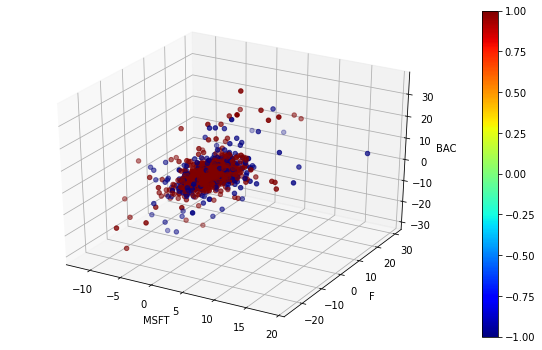

In [ ]:
# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(result.MSFT,result.F,result.BAC,c=yhat,cmap='jet')
ax.set_xlabel('MSFT')
ax.set_ylabel('F')
ax.set_zlabel('BAC')
fig.colorbar(p)
plt.show()

In [ ]:
outlier = pd.DataFrame(yhat, index=result.index, columns=['yhat'])
result = pd.concat((result,outlier), axis=1)
result.nlargest(5,'Outlier score')

,MSFT,F,BAC,Outlier score,yhat,yhat,yhat
Date,,,,,,,
10/13/2008,18.604651,20.100503,9.199808,11.269084,-1,-1,-1
11/26/2008,2.501251,29.518072,4.256757,11.016388,-1,-1,-1
4/9/2009,2.501297,7.341772,35.269122,10.023290,1,1,1
11/28/2008,-1.317721,25.116279,5.314323,9.905421,-1,-1,-1
1/21/2009,4.870124,-1.877934,30.980392,9.779085,1,1,1


In [ ]:
outlier_detection=result.groupby(by='yhat').agg('count')
outlier_detection

,MSFT,F,BAC,Outlier score
yhat,,,,
-1,448,448,448,448
1,2069,2069,2069,2069


In [ ]:
out_per=(448/2517)
out_per

0.17798967024235202

Summary : 

17.7 % are classified as outlier.

**Assignment 4 -Part 2**

**Question 1**

1. You are provided with the following URL: http://eecs.qmul.ac.uk/~emmanouilb/income_table.html. This webpage includes a table on individuals' income and shopping habits - the same that was used in Lab 2.

  1. **Inspect the HTML code of the above URL, and provide a short report on the various tags present in the code. What is the function of each unique tag present in the HTML code?**

In [ ]:
#code to extract the tags alternatively you can insepct the tags by clicking "view source" in chrome page
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
k=[]
#soup.find_all()
for tag in soup.find_all():
    k.append(tag.name)
#set provides unique elements
print((set(k)))

{'table', 'body', 'tbody', 'html', 'h1', 'p', 'thead', 'tr', 'th', 'td'}


Solution:

Please find the tags present in the above URL

html --> The HTML document itself begins with html and ends with html tag

body --> The visible part of the HTML document is between the body tag

tbody --> conslidate the body in a table

table --> The table tag defines an HTML table

h1 --> defines the most important heading.

p  --> HTML paragraphs are defined with the tag p

th --> Each table header is defined with a  th tag

tr  --> Each table row is defined with a tr tag

td  --> Each table data/cell is defined with a td tag





2. **Using Beautiful Soup, scrape the table and convert it into a pandas dataframe. Perform data cleaning to remove extra characters (no need to handle missing values). In the report, include the code that was used to scrape and convert the table and provide evidence that the table has been successfully scraped and converted (e.g., by displaying the contents of the corresponding dataframe).**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
rows = soup.find_all('tr')
# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list

print(header_list)
df_header = pd.DataFrame(header_list)
print(df_header.head())
#splitting the column into separate based on comma,
df_header2 = df_header[0].str.split(',', expand=True)
df_header2.head()

['[Region, Age, Income, Online Shopper]']
                                       0
0  [Region, Age, Income, Online Shopper]


,0,1,2,3
0,[Region,Age,Income,Online Shopper]


In [ ]:
# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()  # extract the text without HTML tags
    table_list.append(row_cleantext)  # Add the clean table row to the list
    
print(table_list)

['[]', '[India, 49, 86400, No]', '[Brazil, 32, 57600, Yes]', '[USA, 35, 64800, No]', '[Brazil, 43, 73200, No]', '[USA, 45, , Yes]', '[India, 40, 69600, Yes]', '[Brazil, , 62400, No]', '[India, 53, 94800, Yes]', '[USA, 55, 99600, No]', '[India, 42, 80400, Yes]']


In [ ]:
df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)
df_table2.head(10)

,0,1,2,3
0,[],None,None,None
1,[India,49,86400,No]
2,[Brazil,32,57600,Yes]
3,[USA,35,64800,No]
4,[Brazil,43,73200,No]
5,[USA,45,,Yes]
6,[India,40,69600,Yes]
7,[Brazil,,62400,No]
8,[India,53,94800,Yes]
9,[USA,55,99600,No]


In [ ]:
# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[')
df_table2[0] = df_table2[0].str.strip(']')
df_table2[3] = df_table2[3].str.strip(']')
df_table2[2] = df_table2[2].str.strip('\r\n\r\n ')
display(df_table3)

,0,1,2,3
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


In [ ]:
# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')

df = df_table3.rename(columns=df_header2.iloc[0])

display(df)

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


**Question 2**

2. **The list of the various MSc programmes offered by the School of EECS is provided at the following URL: http://eecs.qmul.ac.uk/postgraduate/programmes/. Perform web scraping on the table present in the URL above and convert it into a pandas dataframe that includes one row for each programme of study (as shown in the webpage). The dataframe should include the following 5 columns: name of postgraduate degree programme (e.g., Advanced Electronic and Electrical Engineering), programme code for part-time study (e.g. H60C), programme code for full-time study (e.g., H60A), URL for part-time study programme details, and URL for full-time study programme details. Perform data cleaning to remove unecessary characters when needed. In the report, include the code that was used to scrape, convert, and clean the table and provide evidence that the table has been successfully scraped (e.g., by displaying the contents of the corresponding dataframe)**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
rows = soup.find_all('tr')
# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list
print(header_list)
df_header = pd.DataFrame(header_list)
print(df_header.head())
#splitting the column into separate based on comma,
df_header2 = df_header[0].str.split(',', expand=True)
df_header2.head()


['[Postgraduate degree programmes, Part-time(2 year), Full-time(1 year)]']
                                                   0
0  [Postgraduate degree programmes, Part-time(2 y...


,0,1,2
0,[Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)]


In [2]:
# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()  # extract the text without HTML tags
    table_list.append(row_cleantext)  # Add the clean table row to the list
    
print(table_list)

['[]', '[Advanced Electronic and Electrical Engineering, H60C, H60A]', '[Artificial Intelligence, I4U2\xa0, I4U1\xa0]', '[Big Data Science, H6J6, H6J7]', '[Computer Games, \xa0, I4U4]', '[Computer Science, G4U2, G4U1]', '[Computer Science by Research, G4Q2, G4Q1]', '[Computing and Information Systems, G5U6, G5U5]', '[Data Science and Artificial Intelligence by Conversion, \xa0, I4U5\xa0]', '[Electronic Engineering by Research, H6T6, H6T5]', '[Internet of Things (Data), I1T2, I1T0]', '[Machine Learning for Visual Data Analytics, H6JZ, H6JE]', '[Media and Arts Technology by Research, \xa0, G4Q3]', '[Sound and Music Computing\xa0, H6T4, H6T8]', '[Telecommunication and Wireless Systems, H6JD, H6JA]', '[Digital and Technology Solutions (Apprenticeship), I4DA, \xa0]']


In [3]:
df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)
df_table2.head(10)

,0,1,2
0,[],None,None
1,[Advanced Electronic and Electrical Engineering,H60C,H60A]
2,[Artificial Intelligence,I4U2,I4U1 ]
3,[Big Data Science,H6J6,H6J7]
4,[Computer Games,,I4U4]
5,[Computer Science,G4U2,G4U1]
6,[Computer Science by Research,G4Q2,G4Q1]
7,[Computing and Information Systems,G5U6,G5U5]
8,[Data Science and Artificial Intelligence by C...,,I4U5 ]
9,[Electronic Engineering by Research,H6T6,H6T5]


In [4]:
# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[')
df_table2[0] = df_table2[0].str.strip(']')
df_table2[2] = df_table2[2].str.strip('[')
df_table2[2] = df_table2[2].str.strip(']')
df_table2[2] = df_table2[2].str.strip('\r\n\r\n ')
# Remove all rows with any missing values
df_table3 = df_table2.dropna(axis=0, how='any')
#display(df_table3)

# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[2] = df_header2[2].str.strip(']')
df = df_table3.rename(columns=df_header2.iloc[0])

display(df)

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)
1,Advanced Electronic and Electrical Engineering,H60C,H60A
2,Artificial Intelligence,I4U2,I4U1
3,Big Data Science,H6J6,H6J7
4,Computer Games,,I4U4
5,Computer Science,G4U2,G4U1
6,Computer Science by Research,G4Q2,G4Q1
7,Computing and Information Systems,G5U6,G5U5
8,Data Science and Artificial Intelligence by Co...,,I4U5
9,Electronic Engineering by Research,H6T6,H6T5
10,Internet of Things (Data),I1T2,I1T0


In [5]:
all_links = soup.find_all("td")
print(all_links)
#all_links.find.a.get('href')

#soup.find("tr").get('href')


[<td><span>Advanced Electronic and Electrical Engineering</span></td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60C</a></td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60A</a></td>, <td>Artificial Intelligence</td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U2</a> </td>, <td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U1</a> </td>, <td><span>Big Data Science</span></td>, <td style="text-align: center;"><a 

**Question 3**

3. **Consider the graph in the figure below, which represents the links between 5 webpages.**

    2. **Assume that this graph is to be used as input to the PageRank algorithm. Calculate the transition probabilities  pij  for all 5 nodes in the graph below (where  i  and  j  take values between 1 to 5). Add transitions with a uniform probability distribution in the case of dead-end nodes (do not consider cases of dead-end components)**





    

Solution: 

The dead end nodes are 1 and 2. Added artifical links from the dead end node to all nodes including itself.



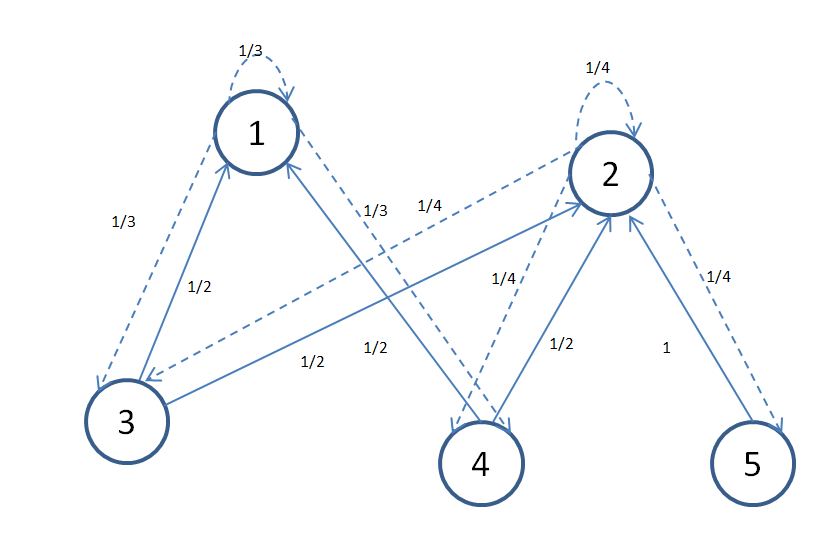


3. **Derive the PageRank  π(i)  for all nodes, where  i={1,...5}  corresponds to the node index. Assume that the teleportation probability is set to  α** .

Solution:

The PageRank π(i) of node i is given by the steady-state probability of node i:

π(i) = α 1/n + (1 − α) E j∈I (i) π(j) · pji

π(1) = α 1/5 +(1- α). (π(1)/3 + π(3)/2 + π(4)/2)

π(2) = α 1/5 +(1- α). (π(2)/4 +  π(3)/2 + π(4)/2 + π(5)/1)

π(3) = α 1/5 +(1- α).( π(1)/3 + π(2)/4 )

π(4) = α 1/5 +(1- α)( π(2)/4 + π(1)/3)

π(5) = α 1/5 +(1- α). π(2)/4 

